## Transaction Prediction

At Santander our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.

Our data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.

## Table of Content

* Load packages
* EDA
* Model
* Evaluation
* Submission

## Load packages 

In [58]:
import os
import numpy as np
import pandas as pd
import time
import gc
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold, KFold,train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


In [11]:
main_dir = "C://Users//nqi200//Desktop/DSA/"
data_dir = main_dir + "/data"

os.chdir(data_dir)

In [12]:
print("Reading train data...")
start = time.time()
train = pd.read_csv('train.csv')
end = time.time()

print("It takes {0:.2f} seconds to read 'train.csv'.".format(end - start))

Reading train data...
It takes 7.01 seconds to read 'train.csv'.


In [31]:
print("Reading test data...")
start = time.time()
test_eva = pd.read_csv('test.csv')
end = time.time()

print("It takes {0:.2f} seconds to read 'test.csv'.".format(end - start))

Reading test data...
It takes 6.74 seconds to read 'test.csv'.


## EDA

In [14]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [16]:
train.sample(n =5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
144481,train_144481,1,7.0624,-7.2332,12.3246,7.7310,10.1362,-1.6005,3.3656,20.3071,...,4.5242,7.0857,-0.4390,5.6460,17.1652,-0.5625,0.7888,10.1711,14.9745,-11.8760
63830,train_63830,0,8.8304,-2.1175,17.1229,3.4076,9.7753,0.1624,4.3116,15.1633,...,1.1702,3.3899,0.4775,5.5927,18.8016,-1.4285,-3.1060,9.5910,14.6214,-14.3529
3848,train_3848,0,11.8585,-6.4825,8.5970,7.0946,11.3251,-10.8982,6.8775,18.2627,...,0.8799,6.0928,3.9597,-5.1066,23.4852,-3.0663,1.2430,10.2610,20.7790,11.8686
147779,train_147779,0,9.3866,-6.3628,8.7763,8.1103,10.6564,-16.0272,6.3845,15.4696,...,4.0928,4.0358,2.4124,8.9069,14.2732,1.3097,0.2994,8.6374,23.3513,5.1667
157903,train_157903,1,9.0975,-10.6693,11.2019,3.0495,9.1570,4.4450,7.5625,14.7152,...,9.8399,4.7888,2.5088,5.3962,20.7798,-1.9140,10.6896,8.9180,8.6999,-12.2614


In [32]:
test_eva.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [33]:
train.shape, test_eva.shape

((200000, 202), (200000, 201))

In [34]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


Train contains:

* ID_code (string);
* target;
* 200 numerical variables, named from var_0 to var_199;


Test contains:

* ID_code (string);
* 200 numerical variables, named from var_0 to var_199;


In [35]:
train.isnull().values.any()

False

In [36]:
train.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

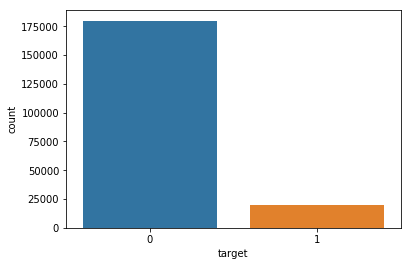

In [37]:
sns.countplot(train['target']);

In [41]:
X = train.drop(['target', 'ID_code'], axis=1)
y = train.loc[:,'target']

In [42]:
X.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [50]:
#Scaling 
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

X_scaled = scaler.fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.3,
                                                    random_state =1)

## Neural Network 

* Using sklearn

In [72]:
from textwrap import wrap
from sklearn.neural_network import MLPClassifier

* Simple NN

In [75]:
nn_simple = MLPClassifier(alpha=1e-5, 
                        hidden_layer_sizes=(200), 
                        solver='lbfgs',
                        random_state=1)

In [76]:
fit_nn_simple = nn_simple.fit(X_train, y_train)

In [77]:
acc_train_nn_simple = fit_nn_simple.score(X_train, y_train)

print ("Train Accuracy:", acc_train_nn_simple)

Train Accuracy: 0.9146


In [78]:
y_pred_simple = fit_nn_simple.predict(X_test)

In [79]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_simple)

metrics.auc(fpr, tpr)

0.6278337142841308

* Use RandomizedSearchCV to optimize

In [98]:
#Find the best partameters by using RandomizedSearchCV
parameters_nn = {'solver': ['lbfgs'], 
              'max_iter': [100,200], 
              'alpha': 10.0 ** -np.arange(1, 7), 
            'hidden_layer_sizes':np.arange(5, 21)}

In [99]:
nn_random = RandomizedSearchCV(MLPClassifier(), 
                       parameters_nn, 
                       n_jobs=-1,
                       random_state =1)

In [100]:
nn_random.fit(X_train, y_train)

C:\Users\nqi200\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'solver': ['lbfgs'], 'max_iter': [100, 200], 'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]), 'hidden_layer_sizes': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [101]:
#Best parameters
nn_random.best_params_

{'solver': 'lbfgs', 'max_iter': 200, 'hidden_layer_sizes': 5, 'alpha': 1e-06}

In [102]:
nn_best = MLPClassifier(alpha=1e-6, 
                        hidden_layer_sizes=(5), 
                        max_iter=200,
                        solver='lbfgs')

In [103]:
fit_nn_best = nn_best.fit(X_train, y_train)

In [106]:
y_pred_best = fit_nn_best.predict(X_test)

In [107]:
acc_train_nn_best = fit_nn_best.score(X_train, y_train)

print ("Train Accuracy:", acc_train_nn_simple)

Train Accuracy: 0.9146


In [108]:
#AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_best)

metrics.auc(fpr, tpr)

0.6285848585896441

* Using Keras

In [80]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [81]:
import tensorflow

In [82]:
#Define the model
keras_nn= Sequential()

In [83]:
#Add first input layer with 1 hidden layer
keras_nn.add(Dense(2000, #neurons for hiddenlayers
               input_dim = X_train.shape[1], # number of variables
               activation ='relu'
              ))

In [84]:
#Determine the number of layers in the model
keras_nn.add(Dense(1600,activation ='relu'))
keras_nn.add(Dense(400, activation='relu'))


keras_nn.add(Dense(1, activation ='sigmoid'))

In [85]:
#Compile model
keras_nn.compile(loss ='binary_crossentropy', 
                 optimizer='adam',
                metrics =['accuracy'])

In [86]:
keras_nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 2000)              402000    
_________________________________________________________________
dense_6 (Dense)              (None, 1600)              3201600   
_________________________________________________________________
dense_7 (Dense)              (None, 400)               640400    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 401       
Total params: 4,244,401
Trainable params: 4,244,401
Non-trainable params: 0
_________________________________________________________________


In [87]:
#Fit the momdel
keras_nn.fit(X_train,  #<- training data
            y_train,         #<- training labels
            epochs = 100,    #<- number of epochs for weight backpropagation
             batch_size=1000,
             verbose = 2)     #<- we set this to 0 so we do not see every epoch run

Epoch 1/100
 - 40s - loss: 0.3005 - acc: 0.8956
Epoch 2/100
 - 39s - loss: 0.2447 - acc: 0.9102
Epoch 3/100
 - 40s - loss: 0.2378 - acc: 0.9122
Epoch 4/100
 - 39s - loss: 0.2400 - acc: 0.9116
Epoch 5/100
 - 41s - loss: 0.2364 - acc: 0.9126
Epoch 6/100
 - 39s - loss: 0.2362 - acc: 0.9128
Epoch 7/100
 - 40s - loss: 0.2351 - acc: 0.9131
Epoch 8/100
 - 39s - loss: 0.2368 - acc: 0.9127
Epoch 9/100
 - 39s - loss: 0.2360 - acc: 0.9125
Epoch 10/100
 - 40s - loss: 0.2357 - acc: 0.9128
Epoch 11/100
 - 39s - loss: 0.2351 - acc: 0.9127
Epoch 12/100
 - 39s - loss: 0.2407 - acc: 0.9113
Epoch 13/100
 - 40s - loss: 0.2350 - acc: 0.9137
Epoch 14/100
 - 39s - loss: 0.2337 - acc: 0.9139
Epoch 15/100
 - 40s - loss: 0.2350 - acc: 0.9132
Epoch 16/100
 - 40s - loss: 0.2358 - acc: 0.9133
Epoch 17/100
 - 41s - loss: 0.2355 - acc: 0.9128
Epoch 18/100
 - 42s - loss: 0.2355 - acc: 0.9129
Epoch 19/100
 - 39s - loss: 0.2347 - acc: 0.9134
Epoch 20/100
 - 40s - loss: 0.2341 - acc: 0.9136
Epoch 21/100
 - 40s - loss: 0

In [94]:
#Evaluation
keras_scores = keras_nn.evaluate(X_train, y_train)

140000/140000 [==============================] - ETA: 48 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - E

In [91]:
keras_scores[1]*100

91.73

In [96]:
y_pred_keras = keras_nn.predict(X_test)

In [97]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_keras)

metrics.auc(fpr, tpr)

0.8487992742290897